In [1]:
import pandas as pd
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db
import json
import csv
import os.path

filename = 'master_measurments_22_03_2021_backup.csv'
 
# Fetch the service account key JSON file contents
cred = credentials.Certificate('nmbu-b421b-firebase-adminsdk-g2wnw-0cbc120783.json')
 
# Initialize the app with a service account, granting admin privileges
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://nmbu-b421b.firebaseio.com/'
})

file_exists = os.path.isfile(filename)

fieldnames_friendly = ['d', 't', 'PV panel', 'sensor 1', 'sensor 2', 'sensor 3', 'sensor 4'] 
fieldnames_working = ['d', 't', '3a0038000851353531343431', '310042000b47363339343638', '21001d000c47363339343638', '2c0024000c47363339343638', '420024000347363339343638']  

firebase_file = open(filename, 'a', newline='') 
csv_writer = csv.DictWriter(firebase_file, fieldnames=fieldnames_friendly) 
     
if not file_exists:
    csv_writer.writeheader()

csv_writer = csv.DictWriter(firebase_file, fieldnames=fieldnames_working) 

NMBUref = db.reference('NMBUdata')
NMBUdat = NMBUref.get()
d = {}
for dat in NMBUdat:
    d.update({'d': dat})
    for hou in NMBUdat[dat]:
        delete_user_ref = NMBUref.child(dat).child(hou)
        for tim in NMBUdat[dat][hou]:
            d.update({'t': tim}) 
            for ent in NMBUdat[dat][hou][tim]:
                d.update(NMBUdat[dat][hou][tim][ent])
            csv_writer.writerow(d)
            d = {}
        #delete_user_ref.delete() #uncomment if you want to delete backuped data from database
        
df = pd.read_csv(filename)

In [1]:
import pandas as pd

df = pd.read_csv('master_measurments_22_03_2021.csv')

df

,d,t,PV panel,sensor 1,sensor 2,sensor 3,sensor 4
0,220321.0,85342,NaN,"960.9,960.9,960.1,960.1,960.1,959.8,959.1,959....","870,870.7,870.3,870.3,870.3,870.3,870,870,870....","866.1,866.7,866.7,866.4,866.7,866.1,866.1,866....","835.5,835.5,836.1,835.5,835.5,835.1,834.8,835...."
1,NaN,85343,NaN,"958.7,959.1,959.1,959.1,958.7,958.7,959.1,959....","869.7,870,870,870,869.7,869.4,870,869.7,869.7,...","866.1,866.4,866.4,865.4,866.1,865.4,865.1,865....","833.5,833.8,834.2,834.2,834.5,833.8,833.5,833...."
2,NaN,85344,NaN,"959.1,958.7,958.7,958.4,958.7,959.1,958.7,958....","868.1,868.4,868.1,867.7,868.7,868.7,868.1,867....","865.4,865.4,866.1,865.7,865.1,865.1,865.4,865....","833.2,833.2,833.8,834.2,833.5,833.2,834.2,833...."
3,NaN,85345,NaN,"957.3,956.9,956.9,956.9,957.7,957.3,956.9,957....","867.7,867.4,867.1,867.1,867.1,867.4,867.4,867....","865.1,865.1,865.1,864.8,864.8,865.7,864.8,865....","831.2,830.5,830.5,831.2,831.2,831.5,831.5,830...."
4,NaN,85346,NaN,"956.9,956.6,957.7,956.6,956.2,957.3,956.6,956....","866.8,866.4,866.4,866.4,866.8,866.8,867.4,866....","864.8,864.4,864.1,864.1,864.4,864.8,864.4,864....","829.2,829.2,829.2,828.9,829.5,829.5,829.5,829...."
...,...,...,...,...,...,...,...
20670,NaN,143812,NaN,"300.4,300.7,300.4,300.4,300.4,300.7,300.7,300....","287.4,287.4,287.4,287.4,287.4,287.4,287.1,287....","279.8,279.8,279.8,279.8,279.8,280.2,279.8,280....","471.2,471.2,470.9,470.9,470.9,470.9,470.9,470...."
20671,NaN,143813,NaN,"300.4,300.4,300.4,300.4,299.6,300.4,300.4,300....","287.4,287.4,287.4,287.4,287.4,287.4,287.4,287....","279.8,280.2,280.2,280.2,280.2,279.8,280.2,280....","469.9,470.2,469.9,469.9,469.9,469.9,469.9,469...."
20672,NaN,143814,NaN,"300.7,300.4,300.7,300.7,300.7,300.7,300.7,300....","287.4,287.4,287.4,287.4,287.4,287.4,287.4,287....","280.2,279.8,280.2,280.2,280.2,280.2,280.2,280....","468.9,468.6,468.6,468.9,468.6,468.2,467.9,467...."
20673,NaN,143815,NaN,"300.7,300.7,300.7,300.7,300.7,300.7,300.4,300....","287.7,287.7,287.4,287.4,287.4,287.7,287.4,287....","280.2,280.5,280.2,280.2,280.5,280.2,280.2,280....","467.3,467.3,467.3,466.9,467.3,466.9,466.9,466...."


### Direction southeast, 1020m

In [2]:
df.drop(['PV panel', 'd'], axis=1, inplace=True)
nan_string = '0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0'
df_clean = df.fillna(nan_string)
df_clean

,t,sensor 1,sensor 2,sensor 3,sensor 4
0,85342,"960.9,960.9,960.1,960.1,960.1,959.8,959.1,959....","870,870.7,870.3,870.3,870.3,870.3,870,870,870....","866.1,866.7,866.7,866.4,866.7,866.1,866.1,866....","835.5,835.5,836.1,835.5,835.5,835.1,834.8,835...."
1,85343,"958.7,959.1,959.1,959.1,958.7,958.7,959.1,959....","869.7,870,870,870,869.7,869.4,870,869.7,869.7,...","866.1,866.4,866.4,865.4,866.1,865.4,865.1,865....","833.5,833.8,834.2,834.2,834.5,833.8,833.5,833...."
2,85344,"959.1,958.7,958.7,958.4,958.7,959.1,958.7,958....","868.1,868.4,868.1,867.7,868.7,868.7,868.1,867....","865.4,865.4,866.1,865.7,865.1,865.1,865.4,865....","833.2,833.2,833.8,834.2,833.5,833.2,834.2,833...."
3,85345,"957.3,956.9,956.9,956.9,957.7,957.3,956.9,957....","867.7,867.4,867.1,867.1,867.1,867.4,867.4,867....","865.1,865.1,865.1,864.8,864.8,865.7,864.8,865....","831.2,830.5,830.5,831.2,831.2,831.5,831.5,830...."
4,85346,"956.9,956.6,957.7,956.6,956.2,957.3,956.6,956....","866.8,866.4,866.4,866.4,866.8,866.8,867.4,866....","864.8,864.4,864.1,864.1,864.4,864.8,864.4,864....","829.2,829.2,829.2,828.9,829.5,829.5,829.5,829...."
...,...,...,...,...,...
20670,143812,"300.4,300.7,300.4,300.4,300.4,300.7,300.7,300....","287.4,287.4,287.4,287.4,287.4,287.4,287.1,287....","279.8,279.8,279.8,279.8,279.8,280.2,279.8,280....","471.2,471.2,470.9,470.9,470.9,470.9,470.9,470...."
20671,143813,"300.4,300.4,300.4,300.4,299.6,300.4,300.4,300....","287.4,287.4,287.4,287.4,287.4,287.4,287.4,287....","279.8,280.2,280.2,280.2,280.2,279.8,280.2,280....","469.9,470.2,469.9,469.9,469.9,469.9,469.9,469...."
20672,143814,"300.7,300.4,300.7,300.7,300.7,300.7,300.7,300....","287.4,287.4,287.4,287.4,287.4,287.4,287.4,287....","280.2,279.8,280.2,280.2,280.2,280.2,280.2,280....","468.9,468.6,468.6,468.9,468.6,468.2,467.9,467...."
20673,143815,"300.7,300.7,300.7,300.7,300.7,300.7,300.4,300....","287.7,287.7,287.4,287.4,287.4,287.7,287.4,287....","280.2,280.5,280.2,280.2,280.5,280.2,280.2,280....","467.3,467.3,467.3,466.9,467.3,466.9,466.9,466...."


In [3]:
def convert_data_format(df, columns=None):
    if columns == None:
        columns = ['sensor 1', 'sensor 2', 'sensor 3', 'sensor 4']
        
    val_dict = dict()
    for column in columns:
        val_dict[column] = []
        
    for row in range(0, len(df)):
        for key in val_dict:
            unpacked = [float(number) for number in str(df[key].iloc[row]).split(',')]
            if len(unpacked) < 20:
                #print(row, key, len(unpacked))
                val_dict[key].append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
            else:
                val_dict[key].append(unpacked)
    
    for key in val_dict:
        val_dict[key] = [item for sublist in val_dict[key] for item in sublist]
        
    #Make a new timestamp with higher resolution    
    time = list(df['t'])
    new_time = []

    for timestamp in time:
        for decimal in range(0, 20):
            new_time.append(timestamp + decimal/20)
    
    val_dict['time'] = new_time
    #Create a new dataframe with the new timestamps and values
    #for key in val_dict.keys():
        #print(key, len(val_dict[key]))
    new_frame = pd.DataFrame(val_dict)
    
    return new_frame


def time_convert(time_column):
    import datetime as dt
    
    time_column = time_column.add(10000) # add an hour

    time_column = time_column.apply(lambda x: str(f'{x:.2f}').zfill(9))
    
    time_column = time_column.apply(lambda x: dt.datetime.strptime(x, '%H%M%S.%f').strftime('%H:%M:%S:%f'))
    
    time_column = pd.to_datetime(time_column, format=f'%H:%M:%S:%f').dt.time
    return time_column


def define_mode(df, sensor, dP=700, dT=20):
    local_max = 0
    local_min = 0 
    max_index = 0
    min_index = 0
    interval = 0
    interval_list = []
    index_counter = df.index[0]
    while index_counter < df.index[-1]:
        #print(1)
        if interval >= 20*dT:
            local_max = 0
            local_min = 0
            interval = 0
            max_index = index_counter
            min_index = index_counter
            
        if local_max - local_min > dP:
            interval_list.append((min_index, max_index, max_index-min_index))
            local_max = 0
            local_min = 0
            interval = 0
            max_index = index_counter
            min_index = index_counter
            
        current_value = df[f'sensor {sensor}'][index_counter]
        if local_max == 0:
            local_max = current_value
        if local_min == 0:
            local_min = current_value
        
        if current_value > local_max:
            local_max = current_value
            max_index = index_counter
        
        if current_value < local_min:
            local_min = current_value
            min_index = index_counter
        
        index_counter += 1
        interval += 1
    return interval_list

In [4]:
processed_data = convert_data_format(df)
processed_data['datetime'] = time_convert(processed_data['time'])
processed_data = processed_data[['datetime', 'time', 'sensor 1', 'sensor 2', 'sensor 3', 'sensor 4']]

In [5]:
processed_data

,datetime,time,sensor 1,sensor 2,sensor 3,sensor 4
0,09:53:42,85342.00,960.9,870.0,866.1,835.5
1,09:53:42.050000,85342.05,960.9,870.7,866.7,835.5
2,09:53:42.100000,85342.10,960.1,870.3,866.7,836.1
3,09:53:42.150000,85342.15,960.1,870.3,866.4,835.5
4,09:53:42.200000,85342.20,960.1,870.3,866.7,835.5
...,...,...,...,...,...,...
413495,15:38:16.750000,143816.75,301.1,287.7,280.5,464.6
413496,15:38:16.800000,143816.80,300.7,287.7,280.5,464.6
413497,15:38:16.850000,143816.85,300.7,287.7,280.5,464.3
413498,15:38:16.900000,143816.90,301.1,287.7,280.5,464.3


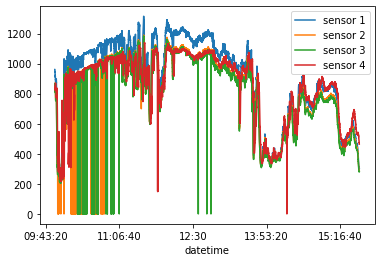

In [6]:
processed_data.plot(x='datetime', y=[f'sensor {nr}' for nr in range(1,5)])

Text(0, 0.5, 'W/m2')

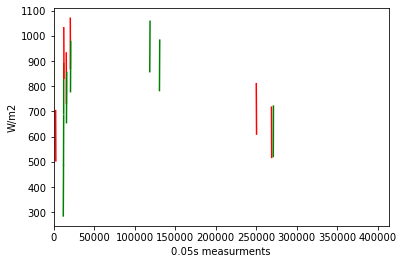

In [7]:
import matplotlib.pyplot as plt
result = define_mode(processed_data, sensor=1, dP=200, dT=20)

for entry in result:
    if entry[0] < entry[1]:
        processed_data['sensor 1'][entry[0]:entry[1]].plot(xlim=[0, len(processed_data)], c='g')
    else:
        processed_data['sensor 1'][entry[1]:entry[0]].plot(xlim=[0, len(processed_data)], c='r')
plt.xlabel('0.05s measurments')
plt.ylabel('W/m2')
#plt.ylim([0, 1200])

In [8]:
result

[(2621, 2400, -221),
 (11822, 12111, 289),
 (12112, 12327, 215),
 (12328, 12388, 60),
 (12657, 12470, -187),
 (15694, 15474, -220),
 (15771, 16089, 318),
 (20656, 20490, -166),
 (20758, 21031, 273),
 (118632, 119014, 382),
 (130615, 130972, 357),
 (250550, 250173, -377),
 (269219, 268951, -268),
 (271220, 271415, 195)]

In [34]:
del(result[2])

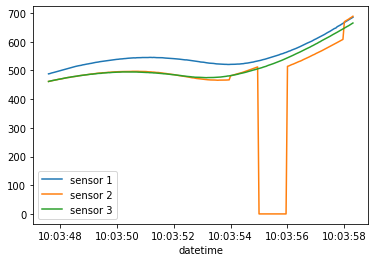

In [33]:
#processed_data.iloc[11512:12347].head(10)
processed_data.iloc[12112:12327].plot(x='datetime', y=[f'sensor {x}' for x in range(1,4)])

In [47]:
def reg_plot(df, sensor_nr, y_lim=None, plot=True):
    from sklearn.metrics import r2_score
    
    x = [x for x in range(df.index[0], df.index[-1]+1)]
    y =  df[f'sensor {sensor_nr}']
    
    reg_model = np.poly1d(np.polyfit(x, y, 3))
    if plot:
        df.plot(y=[f'sensor {sensor_nr}'], ylim=y_lim, x='datetime')
        plt.plot(df['datetime'], reg_model(x), label='3-poly approx')
        plt.legend()
    
    print('R2 score:', r2_score(y, reg_model(x)))
    return reg_model(x), r2_score(y, reg_model(x))


def fraction_point(gradient, frac=0.4):
    return min(gradient)+((1-frac)*(max(gradient)-min(gradient)))


def closest_point(gradient, tol=0.05):
    counter = 0
    frac_point = fraction_point(gradient)
    while True:
        if counter == len(gradient):
            print('WARNING: COULD NOT FIND REFERENCE POINT!')
            break
        
        if abs(gradient[counter] - frac_point) <= tol:
            return gradient[counter]
        counter += 1
        

def find_time_diff(interval, increase=False, fraction=True, tol=0.15):
    sensor1, r2_1 = reg_plot(interval, 1, plot=False)
    gradient1 = np.gradient(sensor1, 0.05)
    interval['gradient1'] = gradient1
    
    sensor2, r2_2 = reg_plot(interval, 2, plot=False)
    gradient2 = np.gradient(sensor2, 0.05)
    interval['gradient2'] = gradient2

    sensor3, r2_3 = reg_plot(interval, 3, plot=False)
    gradient3 = np.gradient(sensor3, 0.05)
    interval['gradient3'] = gradient3
    
    sensor4, r2_4 = reg_plot(interval, 4, plot=False)
    gradient4 = np.gradient(sensor4, 0.05)
    interval['gradient4'] = gradient4

    if fraction:
        index1 = list(gradient1).index(closest_point(gradient1, tol=tol))
        index2 = list(gradient2).index(closest_point(gradient2, tol=tol)) 
        index3 = list(gradient3).index(closest_point(gradient3, tol=tol))
        index4 = list(gradient4).index(closest_point(gradient4, tol=tol))
    else:
        index1 = list(gradient1).index(min(gradient1, key=lambda x:abs(x-0)))
        index2 = list(gradient2).index(min(gradient2, key=lambda x:abs(x-0))) 
        index3 = list(gradient3).index(min(gradient3, key=lambda x:abs(x-0)))
        index4 = list(gradient4).index(min(gradient4, key=lambda x:abs(x-0)))
    
    the_list = [index1, index2, index3]
    
    for n in range(3):
        print(f'sensor {n+1} time', abs((min(the_list)-the_list[n])/20))
    print('sensor 4 time', abs((min(the_list)-index4)/20))

    interval.plot(y=[f'gradient{sensor}' for sensor in range(1,4)], x='datetime', rot=25)
    plt.axvline(interval['datetime'].iloc[index1], c='b')
    plt.axvline(interval['datetime'].iloc[index2], c='orange')
    plt.axvline(interval['datetime'].iloc[index3], c='g')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('d(W/m2) / dT')
    #plt.savefig('intersect.png')
    return index1, index2, index3, index4, (r2_1 + r2_2 + r2_3 + r2_4)/4

R2 score: 0.987946715897361
R2 score: 0.30263196510963586
R2 score: 0.9870978049565868
R2 score: 0.9983532379714334
sensor 1 time 0.0
sensor 2 time 0.0
sensor 3 time 0.0
sensor 4 time 0.0


<ipython-input-47-e1b97a4f24d1>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-47-e1b97a4f24d1>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-47-e1b97a4f24d1>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

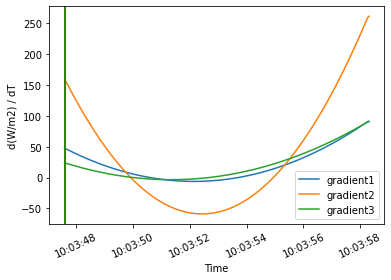

In [48]:
import numpy as np
index1, index2, index3, index4, r2_avg = find_time_diff(processed_data.iloc[12112:12327], fraction=True, tol=50)
# ref_point = -5.857356
# sensor2, r2_2 = reg_plot(processed_data.iloc[12450:12677], 2, plot=True)
# gradient2 = np.gradient(sensor2, 0.05)

# for values in gradient2:
#     if abs(values - ref_point) <= 0.07:
#         print(values)

In [42]:
import numpy as np


def get_all_time_diff(df, tol=0.15, fraction=True, skip=None):
    time_diff_list = []
    r2_list = []
    counter = 0
    for entry in result:
        temp_list = []
        if counter in skip:
            pass
        elif entry[2] >= 0:
            interval = df.iloc[entry[0]:entry[1]]
            index1, index2, index3, index4, r2_avg = find_time_diff(interval, increase=True, fraction=fraction, tol=tol)
            the_list = [index1, index2, index3]
            for n in range(3):
                temp_list.append(abs((min(the_list)-the_list[n])/20))
            
        else:
            interval = df.iloc[entry[1]:entry[0]]
            index1, index2, index3, index4, r2_avg = find_time_diff(interval, fraction=fraction, tol=tol)
            the_list = [index1, index2, index3]
            for n in range(3):
                temp_list.append(abs((min(the_list)-the_list[n])/20))
        time_diff_list.append(temp_list)
        r2_list.append(r2_avg)
        counter += 1
    print('Average R2 score:', sum(r2_list)/len(result))
    return time_diff_list

R2 score: 0.9996838097149767
R2 score: 0.9999016365070333
R2 score: 0.99972443282038
R2 score: 0.9981259746547775
sensor 1 time 0.0
sensor 2 time 1.6
sensor 3 time 7.45
sensor 4 time 1.5
R2 score: 0.9810183241925189
R2 score: 0.978363503551709
R2 score: 0.9888750320833993
R2 score: 0.9916939393271164
sensor 1 time 0.2
sensor 2 time 0.15
sensor 3 time 0.0
sensor 4 time 0.8
R2 score:

<ipython-input-47-e1b97a4f24d1>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-47-e1b97a4f24d1>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-47-e1b97a4f24d1>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

 0.9997842478599616
R2 score: 0.9999214496583492
R2 score: 0.9998677395063625
R2 score: 0.9987541789985446
sensor 1 time 0.25
sensor 2 time 0.0
sensor 3 time 0.1
sensor 4 time 0.3
R2 score: 0.9984826103622275
R2 score: 0.9991873362317986
R2 score: 0.9994041882390412
R2 score: 0.9878509490065607
sensor 1 time 0.4
sensor 2 time 0.65
sensor 3 time 0.0
sensor 4 time 5.3
R2 score: 0.9763294973044462
R2 score: 0.9738596685111595
R2 score: 0.9771114497316984
R2 score: 0.9477414300800195
sensor 1 time 1.4
sensor 2 time 0.15
sensor 3 time 0.0
sensor 4 time 9.35


<ipython-input-47-e1b97a4f24d1>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-47-e1b97a4f24d1>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-47-e1b97a4f24d1>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

R2 score: 0.9994541354077843
R2 score: 0.9994647481920815
R2 score: 0.9998493687574453
R2 score: 0.4480042537624094
sensor 1 time 0.25
sensor 2 time 0.15
sensor 3 time 0.0
sensor 4 time 0.45
R2 score: 0.9593753590933373
R2 score: 0.9815151617116384
R2 score: 0.9747978626859114
R2 score: 0.9610124487233809
sensor 1 time 0.25
sensor 2 time 0.0
sensor 3 time 0.05
sensor 4 time 4.65
R2 score: 0.9993033537111413
R2 score: 0.9988930650784706
R2 score: 0.9991068967706204


<ipython-input-47-e1b97a4f24d1>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-47-e1b97a4f24d1>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-47-e1b97a4f24d1>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

R2 score: 0.9870318083617972
sensor 1 time 2.8
sensor 2 time 0.05
sensor 3 time 0.0
sensor 4 time 7.7
R2 score: 0.9998034017307635
R2 score: 0.9997859346103873
R2 score: 0.9999026800102139
R2 score: 0.9964259387435512
sensor 1 time 0.9
sensor 2 time 1.75
sensor 3 time 0.0
sensor 4 time 11.4
R2 score:

<ipython-input-47-e1b97a4f24d1>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient4'] = gradient4
<ipython-input-47-e1b97a4f24d1>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-47-e1b97a4f24d1>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

 0.998855546626199
R2 score: 0.9990776730410439
R2 score: 0.9989683796560295
R2 score: 0.9454055549600417
sensor 1 time 0.65
sensor 2 time 0.8
sensor 3 time 0.0
sensor 4 time 11.35


<ipython-input-47-e1b97a4f24d1>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-47-e1b97a4f24d1>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-47-e1b97a4f24d1>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

R2 score: 0.9999108681498139
R2 score: 0.9998737814560076
R2 score: 0.9999771649365887
R2 score: 0.9961579480724324
sensor 1 time 1.55
sensor 2 time 1.6
sensor 3 time 0.0
sensor 4 time 1.7
R2 score: 0.9999728777215723
R2 score: 0.9999772600621121
R2 score: 0.999968482574155
R2 score: 0.997686320762807
sensor 1 time 0.9
sensor 2 time 0.55
sensor 3 time 0.0
sensor 4 time 5.05
Average R2 score: 0.9802921244782031


<ipython-input-47-e1b97a4f24d1>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-47-e1b97a4f24d1>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-47-e1b97a4f24d1>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

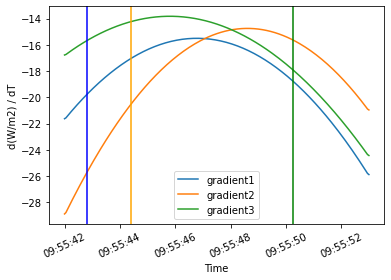

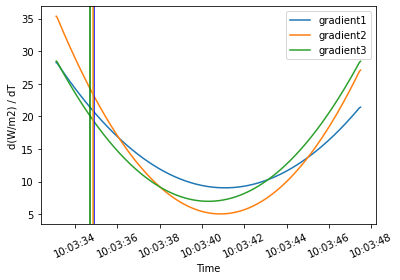

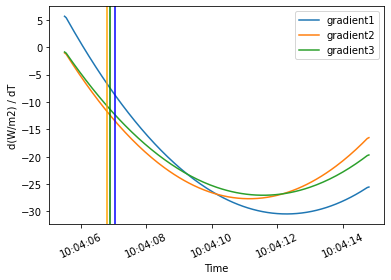

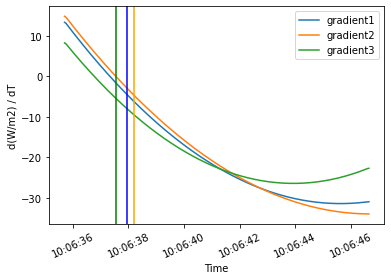

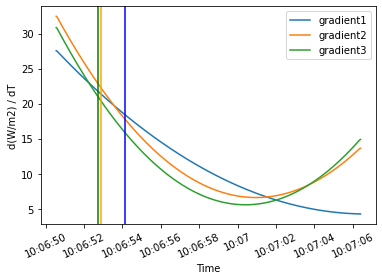

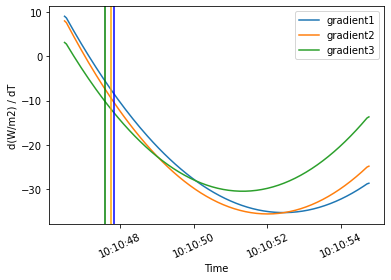

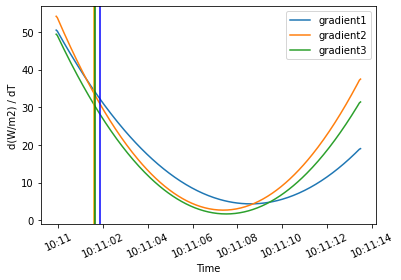

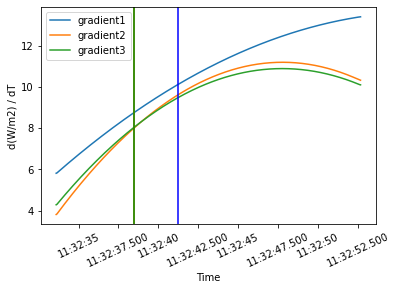

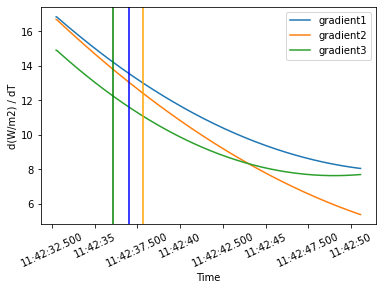

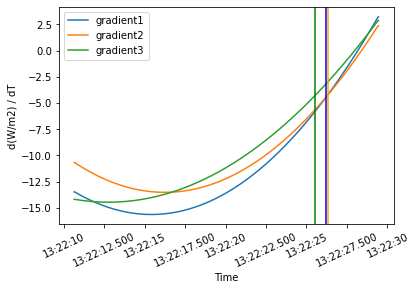

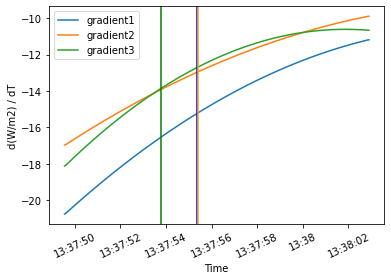

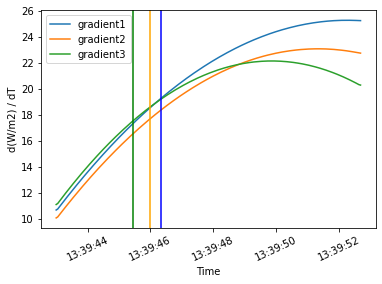

In [49]:
time_diffs = get_all_time_diff(processed_data, tol=0.24, fraction=True, skip=[2])

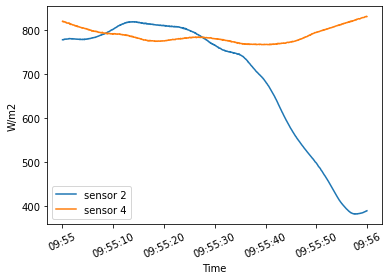

In [155]:
def plot_interval(df, start, stop, sensors=None):
    if sensors == None:
        sensors = [1, 2, 3, 4]
    sliced_data = df.loc[(stop > df['time']) & (df['time'] > start)]
    color_dict = {1: 'c', 2:'gold', 3:'g'}
    xs = [x for x in range(len(sliced_data))]
    sliced_data.plot(x='datetime', y=[f'sensor {sensor}' for sensor in sensors], rot=25)
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('W/m2')


plot_interval(processed_data, 85500, 85600, sensors=[2, 4])

In [44]:
time_diffs

[[0.0, 1.6, 7.45],
 [0.2, 0.15, 0.0],
 [],
 [0.25, 0.0, 0.1],
 [0.4, 0.65, 0.0],
 [1.4, 0.15, 0.0],
 [0.25, 0.15, 0.0],
 [0.25, 0.0, 0.05],
 [2.8, 0.05, 0.0],
 [0.9, 1.75, 0.0],
 [0.65, 0.8, 0.0],
 [1.55, 1.6, 0.0],
 [0.9, 0.55, 0.0]]

In [15]:
from math import sin, cos, acos, asin, degrees, radians, sqrt, atan
from statistics import median
import matplotlib.pyplot as plt


def calculate_angle(mid_time, end_time, distance):
    over = end_time*distance - mid_time*distance*cos(radians(60))
    under = mid_time*distance*sin(radians(60))
    return degrees(atan((over/under)))


def triangulate(a_time, b_time, c_time):
    distance = 15
    
    time_dict = {'A': a_time, 'B': b_time, 'C': c_time}
    
    start_point = min(time_dict, key=time_dict.get)
    start_time = time_dict[start_point]
    
    end_point = max(time_dict, key=time_dict.get)
    end_time = time_dict[end_point] - start_time
    
    time_dict.pop(start_point)
    time_dict.pop(end_point)
    
    mid_point = max(time_dict, key=time_dict.get)
    mid_time = time_dict[mid_point] - start_time
    
    print(f'{start_point}:{start_time} | {mid_point}:{mid_time} | {end_point}:{end_time}')
   
    angle = calculate_angle(mid_time, end_time, distance)
    
    if start_point == 'A':
        if b_time <= c_time:
            north = 30
            angle = -calculate_angle(mid_time, end_time, distance)
        else:
            north = 330
            angle = calculate_angle(mid_time, end_time, distance)
    
    elif start_point == 'B':
        if a_time <= c_time:
            north = 210
            angle = calculate_angle(mid_time, end_time, distance)
        else:
            north = 270
            angle = -calculate_angle(mid_time, end_time, distance)
        
    elif start_point == 'C':
        if a_time <= b_time:
            north = 150
            angle = -calculate_angle(mid_time, end_time, distance)
        else:
            north = 90
            angle = calculate_angle(mid_time, end_time, distance)
    
    speed = (distance*cos(radians(angle)))/mid_time
    
    if 0 < north + angle < 360:
        angle_north = north + angle

    elif north + angle < 0:
        angle_north = north + angle + 360
    
    else:
        angle_north = north + angle - 360
    
    print(f'Starts in {start_point}, angle:{angle:.2f}, angle north:{angle_north:.2f}, speed:{speed:.2f} m/s')
    
    height = (sqrt(3)/2)*distance
    y_centre = height - ((distance/2)**2)/((distance*sqrt(3))/2)
    
    plt.quiver(0, y_centre, (sin(radians(north+angle))), cos(radians(north+angle)), scale=7)
    xs = [-distance/2, 0, distance/2, -distance/2]
    ys = [sqrt(distance**2 - (distance/2)**2), 0, sqrt(distance**2 - (distance/2)**2), sqrt(distance**2 - (distance/2)**2)]
    
    plt.plot(xs, ys)
    plt.scatter(xs, ys, color='red')
    plt.text(-distance/2, height-height/10, '3', color='g')
    plt.text(-0.1, height/10, '1', color='g')
    plt.text(distance/2, height-height/10, '2', color='g')
    plt.axis('equal')
    plt.show()
    return angle_north, speed

A:0.0 | B:1.6 | C:7.45
Starts in A, angle:-78.23, angle north:311.77, speed:1.91 m/s


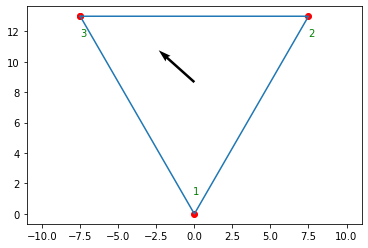

C:0.0 | B:0.15 | A:0.2
Starts in C, angle:43.90, angle north:133.90, speed:72.06 m/s


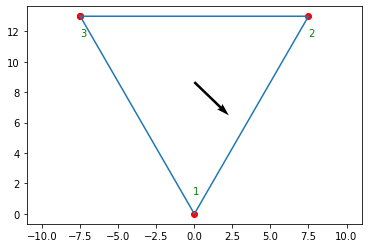

B:0.0 | C:0.1 | A:0.25
Starts in B, angle:-66.59, angle north:203.41, speed:59.60 m/s


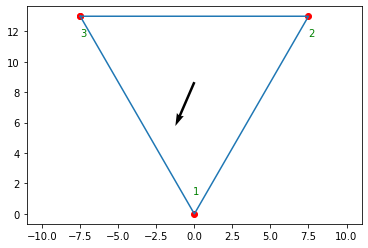

C:0.0 | A:0.4 | B:0.65
Starts in C, angle:-52.41, angle north:97.59, speed:22.87 m/s


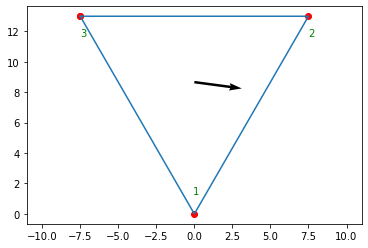

C:0.0 | B:0.15 | A:1.4
Starts in C, angle:84.40, angle north:174.40, speed:9.76 m/s


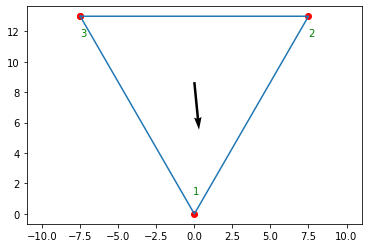

C:0.0 | B:0.15 | A:0.25
Starts in C, angle:53.41, angle north:143.41, speed:59.60 m/s


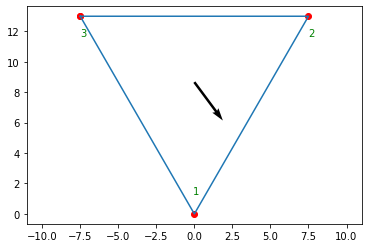

B:0.0 | C:0.05 | A:0.25
Starts in B, angle:-79.11, angle north:190.89, speed:56.69 m/s


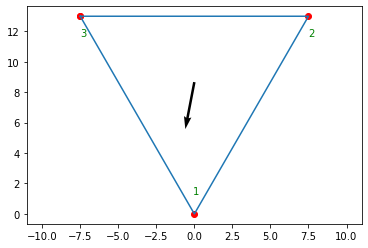

C:0.0 | B:0.05 | A:2.8
Starts in C, angle:89.11, angle north:179.11, speed:4.68 m/s


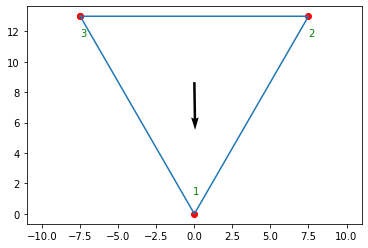

C:0.0 | A:0.9 | B:1.75
Starts in C, angle:-59.05, angle north:90.95, speed:8.57 m/s


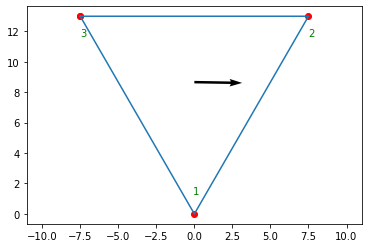

C:0.0 | A:0.65 | B:0.8
Starts in C, angle:-40.16, angle north:109.84, speed:17.64 m/s


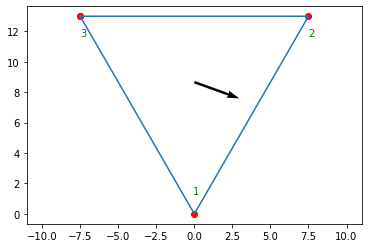

C:0.0 | A:1.55 | B:1.6
Starts in C, angle:-31.57, angle north:118.43, speed:8.24 m/s


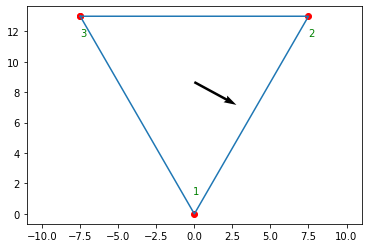

C:0.0 | B:0.55 | A:0.9
Starts in C, angle:52.69, angle north:142.69, speed:16.53 m/s


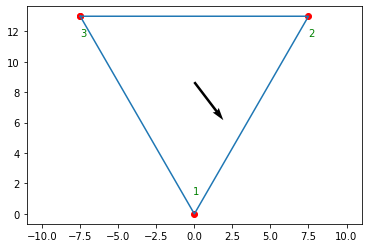

avg angle: 158.03202876368505 std: 58.140186352068795
avg speed: 28.180699644824227 std: 24.751809723236835


In [46]:
triang_speeds = []
triang_angles = []
for entry in time_diffs:
    if len(entry) == 3:
        if not ((entry[0] == 0) and (entry[1] == 0)):
            if not (entry[1] == 0 and entry[2] == 0):
                if not (entry[2] == 0 and entry[0] == 0):
                    angle, speed = triangulate(entry[0], entry[1], entry[2])
                    triang_angles.append(angle)
                    triang_speeds.append(speed)
                
print('avg angle:', sum(triang_angles)/len(triang_angles), 'std:', np.std(triang_angles))
print('avg speed:', sum(triang_speeds)/len(triang_speeds), 'std:', np.std(triang_speeds))

In [151]:
(24.75/28.2)*36.2

31.771276595744688